# Lego Detection Model

## Imports

In [1]:
from scripts.model import *

## Model Execution on an Image

### Getting Lego Count

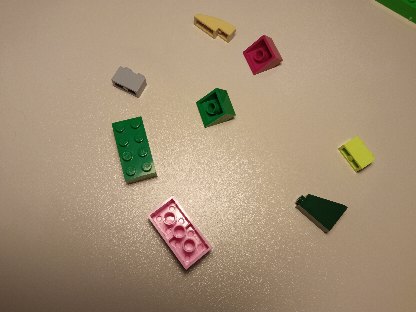

In [2]:
# Load the image
img_id = 11
og_img = loadImage(img_id)
render(og_img)

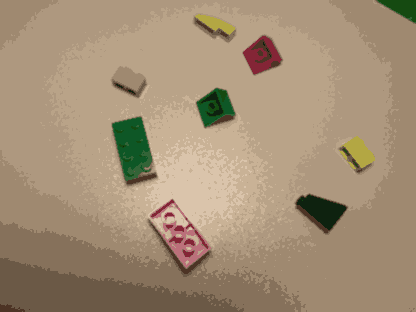

In [3]:
# Use Gaussian Blur & K-means clustering to segment the image into less colors
segmented_img = kmeansBlur(og_img, 3, 15)
render(segmented_img)

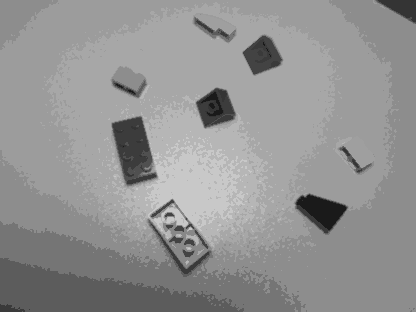

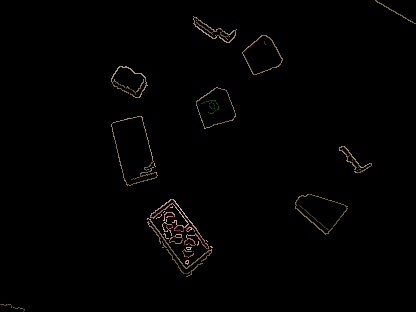

In [4]:
# Fid the edges of the image using Canny edge detection
edges, edge_img = getEdges(segmented_img, 100, 200, True)
render(edge_img)

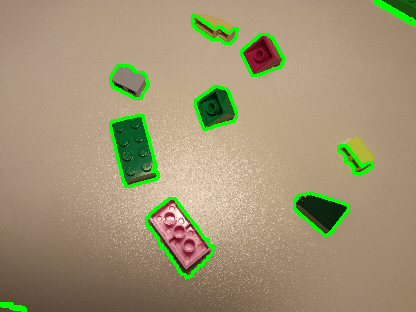

In [5]:
# Get the contours of the edges in the image and connect them if they are close
contour_image, contours = getContours(og_img, edges, 3)
render(contour_image)

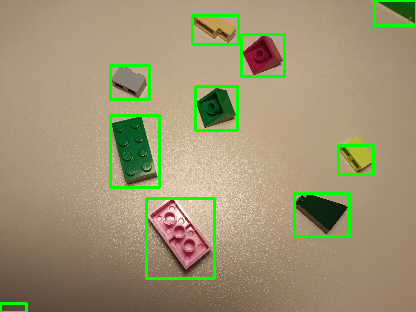

Number of legos found: 10


In [6]:
# Draw bounding boxes around the legos using the contours
num_legos, bounding_box_image, boxes = getBoundingBoxes(og_img, contours, 200, 0.25)
render(bounding_box_image)
print(f"Number of legos found: {num_legos}")

# Evaluate the results of lego counting
_ = guessPieceCount(img_id, num_legos, True)

### Getting Lego's Colors

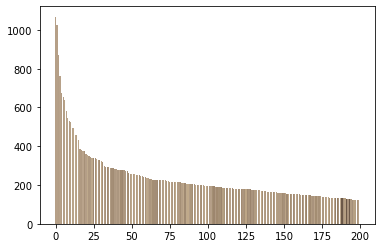

In [7]:
# Getting the most common colors gets us the background colors
# which we can use to remove the background from the bounding boxes
most_common_colors = getMainColors(og_img, 5, 200, True)

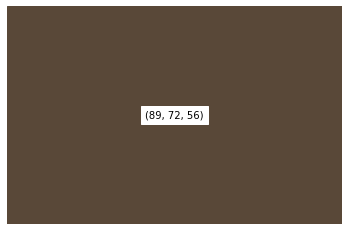

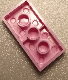

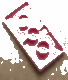

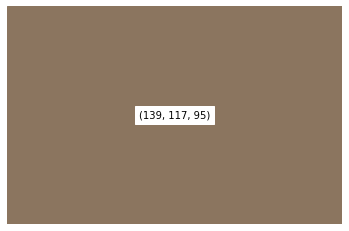

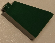

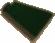

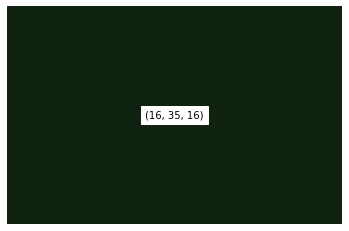

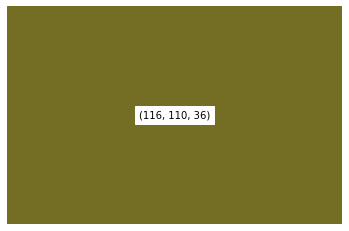

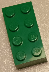

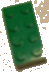

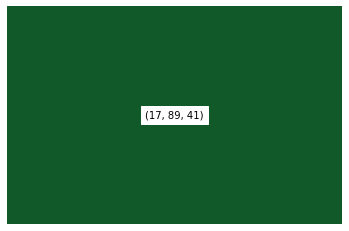

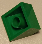

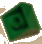

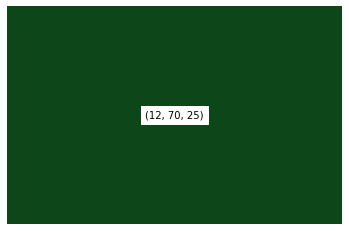

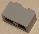

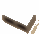

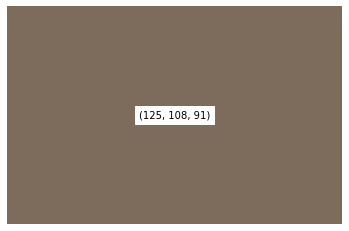

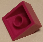

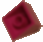

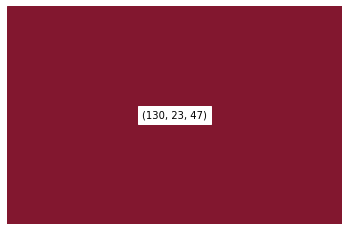

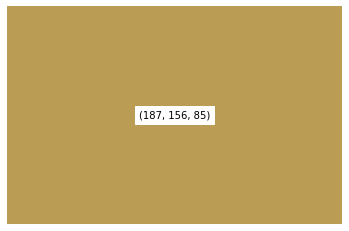

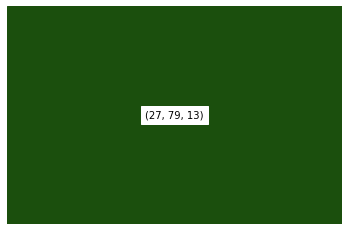

In [8]:
for box in boxes:
    color = getBBColor(og_img, box, most_common_colors, True)

## Applying the model

Img 5 - Count error: 2


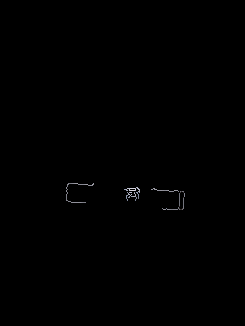

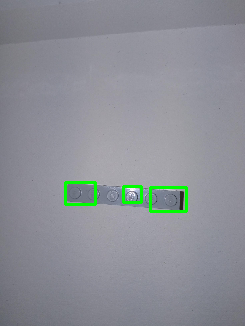

Img 6 - Count error: 1
Img 6 - Color error: 1


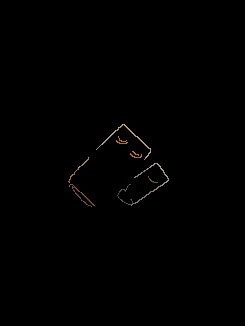

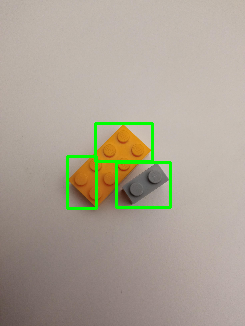

Img 7 - Color error: 1


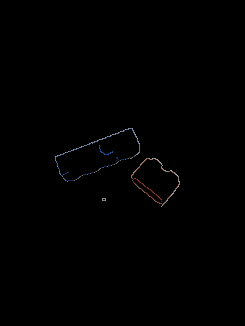

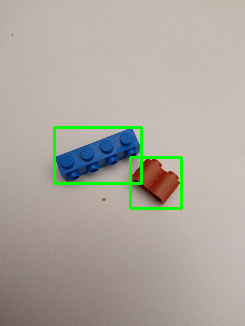

Img 8 - Color error: 1


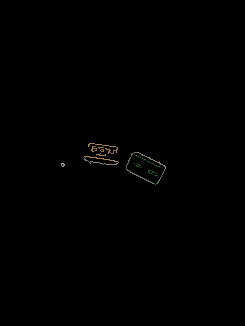

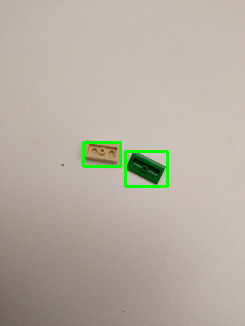

Img 9 - Count error: 1
Img 9 - Color error: 1


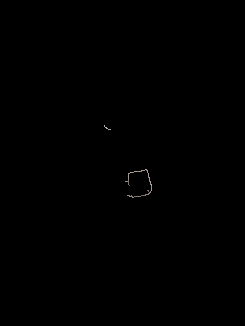

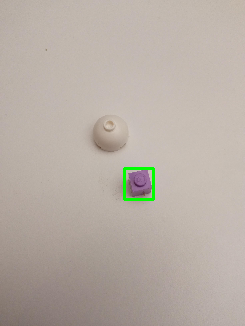

Img 10 - Color error: 1


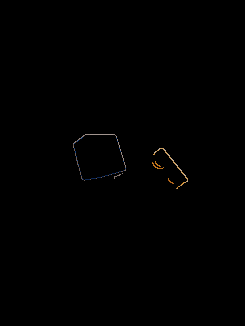

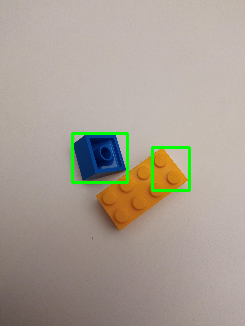

Img 11 - Color error: 5


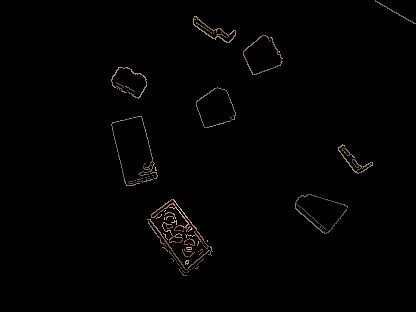

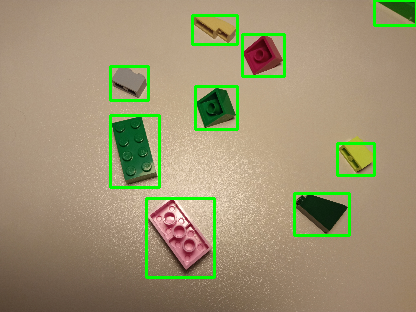

Img 12 - Color error: 5


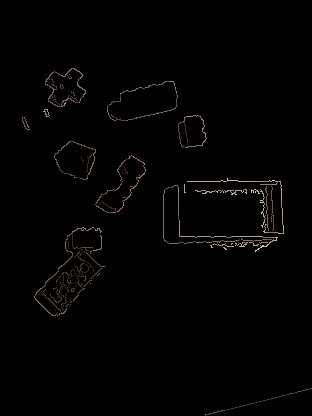

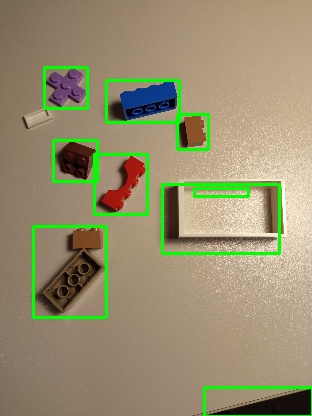

Img 13 - Count error: 3
Img 13 - Color error: 8


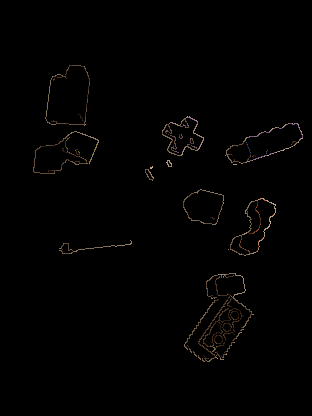

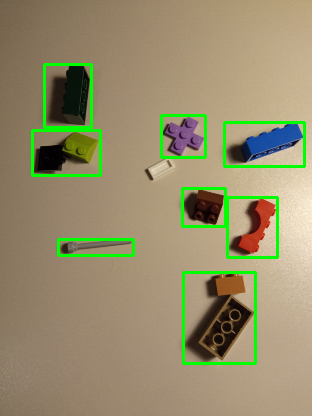

Img 14 - Color error: 5


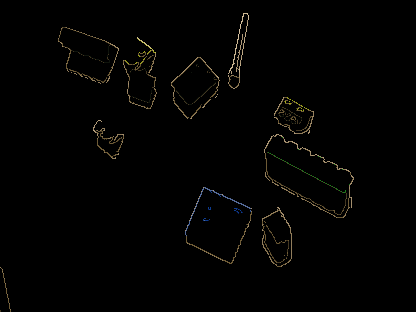

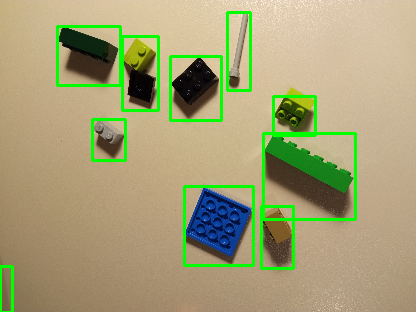

Img 15 - Color error: 2


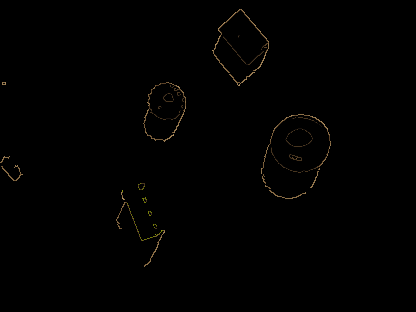

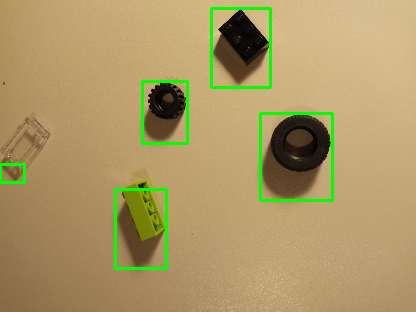

Img 16 - Count error: 2
Img 16 - Color error: 2


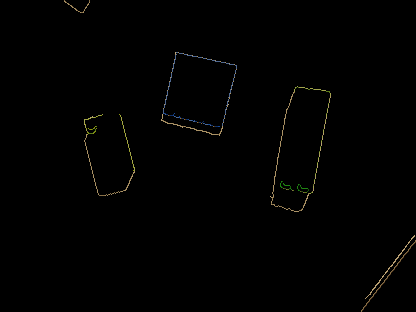

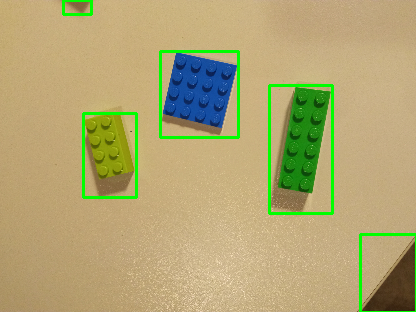

Img 17 - Count error: 1
Img 17 - Color error: 6


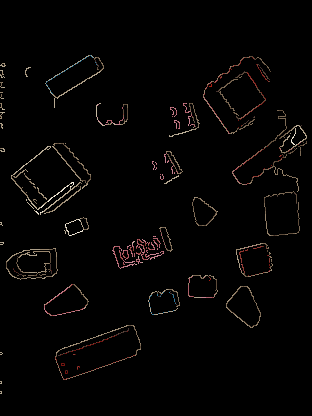

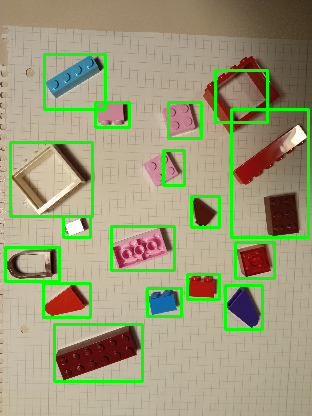

Img 18 - Count error: 1
Img 18 - Color error: 2


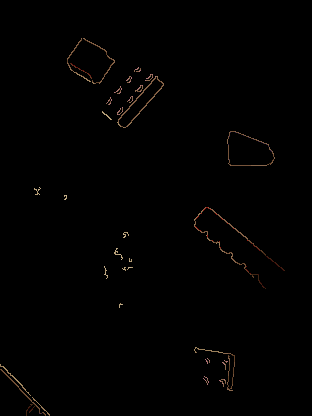

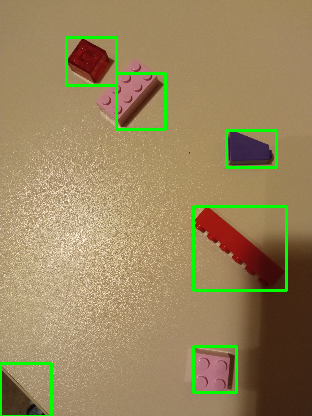

Img 19 - Count error: 7
Img 19 - Color error: 4


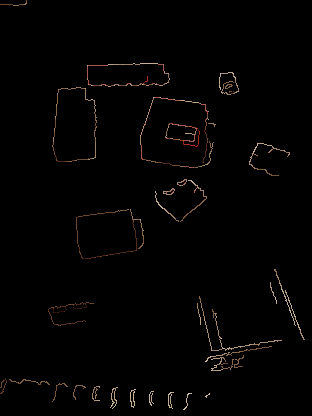

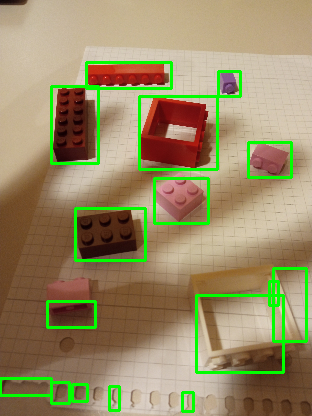

Img 20 - Count error: 1
Img 20 - Color error: 3


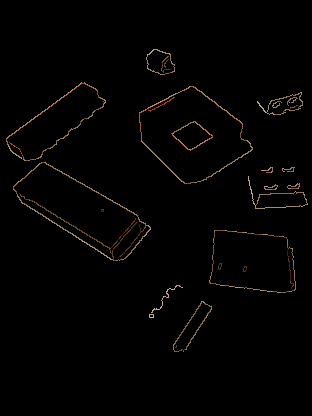

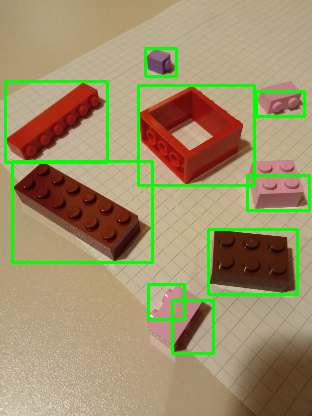

Img 21 - Count error: 1
Img 21 - Color error: 3


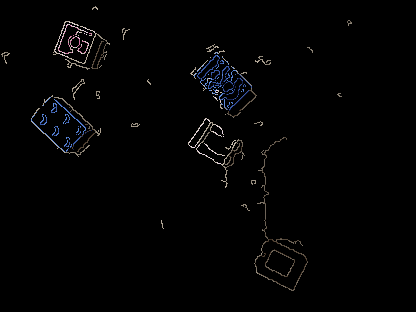

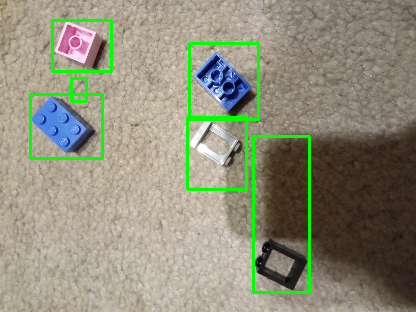

Img 22 - Count error: 5
Img 22 - Color error: 5


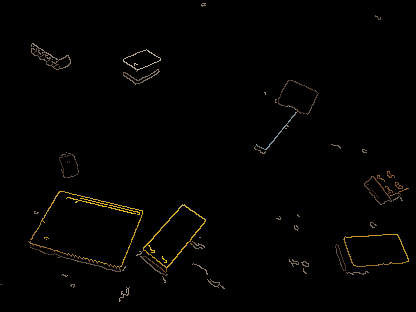

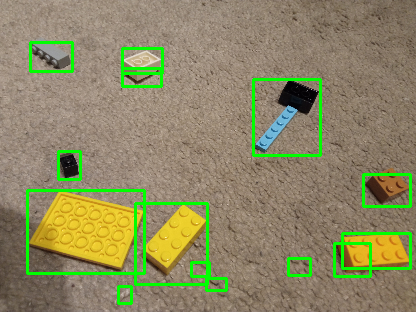

KeyboardInterrupt: 

In [9]:
total_count_errors = 0
piece_count = 0

total_color_errors = 0
color_count = 0

for i in range(1, 50):
    delta_count, piece_count2, delta_color, color_count2, edge_img, bounding_box_image = model(i)

    total_count_errors += delta_count
    total_color_errors += delta_color    
    piece_count += piece_count2
    color_count += color_count2

    if(delta_count > 0 or delta_color > 0):
        if(delta_count > 0):
            print(f"Img {i} - Count error: {delta_count}")
        if(delta_color > 0):
            print(f"Img {i} - Color error: {delta_color}")
        
        render(edge_img)
        render(bounding_box_image)
        
        
print("\n\n===============================\n")        
print(f"Total count errors: {total_count_errors}")
print(f"Total color errors: {total_color_errors}")
print(f"Count Accuracy: {round(100 - (total_count_errors / piece_count) * 100)}%")
print(f"Color Accuracy: {round(100 - (total_color_errors / color_count) * 100)}%")
print("\n===============================\n\n")        